# Оглавление

Тема проекта

Цель проекта

Актуальность

Парсинг

Загрузка данных

Анализ данных

Очистка данных

Features Engineering

Визуализация

Конвертация значений 

Тренировка и обучение 

Обучение модели

Future Importance

У кого самый большой ER?

Вывод

# Тема:
    
Выявление цифровых микро-инфлюенсеров косметических брендов

# Цель:
 
Рекомендтальная система для выбора мирко-инфлюенсера для рекламы бренда "Bemetic"


# Актуальность:

У МСБ после карантина не так много денег и нет права на ошибки в рекламных кампаниях, поэтому важно находить инфо-партнеров, от которых будет больше пользы

# Загрузка библиотек 

In [346]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [347]:
pip install wordcloud 

Note: you may need to restart the kernel to use updated packages.


In [348]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [349]:
!pip install dtreeviz

In [350]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import matplotlib as mpl
import matplotlib.pylab as pylab
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
import graphviz
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.datasets import make_regression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn import tree
import numpy as nm
import random
import time
import warnings
warnings.filterwarnings('ignore')
print('-'*25)
from subprocess import check_output

-------------------------


In [351]:
#Данные по Pure
pure_followers = pd.read_csv('pure_followers.csv') #подписчики Pure
pure_stat = pd.read_csv ('pure_stat.csv') #общая статистика Pure 
pure_parsing = pd.read_csv('pure_parsing.csv')#парсинг акк Pure 

#Данные по инфлюиенсерам 
inf_stat = pd.read_csv('inf_stat.csv') #общая статистика списка инфллюенсеров 
inf_parsing = pd.read_csv('inf_parsing.csv')#парсинг аккаунтов инфлюенсеров 

#Отдельный пасринг каждого аккаунта 
marishrissh_parsing = pd.read_csv('marishrissh_parsing.csv')
kristinaoblomska_parsing = pd.read_csv('kristinaoblomska_parsing.csv')   
adelle_weiss_parsing = pd.read_csv('adelle_weiss_parsing.csv')  
sovaznaet_parsing = pd.read_csv('sovaznaet_parsing.csv')   
diana_legrant_parsing = pd.read_csv('diana_legrant_parsing.csv')   
black_morion_parsing = pd.read_csv('black_morion_parsing.csv')                                   

# Анализ данных

# PURE

Подписчики Pure

In [352]:
#просмотр данных
pure_followers.head()

,ID,Аккаунт,Описание
0,1248749576,qanat.ary,the furthest thing from perfect like everyone ...
1,2004114477,amina_narembekova,Me encanta mi vida✨ 🚷Only friends🌸🌸👭🌸🌸 💕...
2,3159128638,catslover6254,Blessed human being🧚🏻‍♀️
3,256580841,meru_yessendiyarova,Семья - это один из шедевров природы. 👨‍👩‍👧‍👦❤️🙏
4,6210845484,kobzeva.an,Счастливый человек


In [353]:
#просмотр кол-во строк и столбцов
pure_followers.shape

(429, 3)

Общая статистика Pure 

In [354]:
pure_stat

,Followers,Posts_cnt,Likes_cnt,Comments_cnt,ER_Day,ER_Post
0,39619,274,179938,9202,"1,097","1,742"


Полный парсинг акк Pure 

In [355]:
#просмотр данных
pure_parsing.head()

,Unnamed: 0,created_time,user.username,caption.text,likes.count,video_views,comments.count,link
0,0,05/2020,marishrissh,🦋🦋,605,0,21,https://instagram.com/p/CAhV4d9nrx8
1,1,05/2020,marishrissh,Этот бронзер @physiciansformula я достаю тольк...,469,0,33,https://instagram.com/p/CAXKXEPHmpr
2,2,05/2020,marishrissh,Блесками для губ @glossier я пользуюсь уже дав...,463,0,22,https://instagram.com/p/B_9rPl3n8gT
3,3,05/2020,marishrissh,✨,644,0,12,https://instagram.com/p/B_2p74_HdrX
4,4,05/2020,marishrissh,Карандаши для глаз @glossier и @shiseido мне о...,349,0,15,https://instagram.com/p/B_zhrX8ndmU


In [356]:
#просмотр кол-во строк и столбцов
pure_parsing.shape

(156, 8)

In [357]:
#статистический анализ
pure_parsing.describe()

,Unnamed: 0,likes.count,video_views,comments.count
count,156.000000,156.000000,156.000000,156.000000
mean,77.500000,403.250000,65.051282,23.423077
std,45.177428,161.850055,486.552252,22.963657
min,0.000000,123.000000,0.000000,0.000000
25%,38.750000,293.500000,0.000000,7.750000
50%,77.500000,378.500000,0.000000,17.500000
75%,116.250000,479.500000,0.000000,33.000000
max,155.000000,1071.000000,4225.000000,152.000000


In [358]:
#переименование названия столбцов
pure_parsing.rename(columns={'created_time': 'Date', 'user.username': 'Username', 'caption.text': 'Text', 'likes.count': 'Likes', 'comments.count': 'Coments', 'video_views':'Video_views' }, inplace=True)
pure_parsing

,Unnamed: 0,Date,Username,Text,Likes,Video_views,Coments,link
0,0,05/2020,marishrissh,🦋🦋,605,0,21,https://instagram.com/p/CAhV4d9nrx8
1,1,05/2020,marishrissh,Этот бронзер @physiciansformula я достаю тольк...,469,0,33,https://instagram.com/p/CAXKXEPHmpr
2,2,05/2020,marishrissh,Блесками для губ @glossier я пользуюсь уже дав...,463,0,22,https://instagram.com/p/B_9rPl3n8gT
3,3,05/2020,marishrissh,✨,644,0,12,https://instagram.com/p/B_2p74_HdrX
4,4,05/2020,marishrissh,Карандаши для глаз @glossier и @shiseido мне о...,349,0,15,https://instagram.com/p/B_zhrX8ndmU
...,...,...,...,...,...,...,...,...
151,151,11/2017,marishrissh,Сегодня расскажу про мою новую умывалку @jorda...,191,0,44,https://instagram.com/p/BbOc7bGFoOZ
152,152,08/2017,marishrissh,Stratia Liquid Gold или Жидкое Золото представ...,295,0,48,https://instagram.com/p/BXsea4zFhLD
153,153,08/2017,marishrissh,Продолжаю сегодняшнюю тему бессмысленных фотог...,157,0,8,https://instagram.com/p/BXnhvVLlbzd
154,154,03/2017,marishrissh,Знаменитый Organic flowers Toner от @whamisask...,258,0,24,https://instagram.com/p/BRnjRZpgLP2


In [359]:
#изменение порядка названия столбцов и удаление не нужных мне стоолбцов
pure_parsing = pure_parsing [['Username','Date', 'Text','Coments', 'Likes']]
pure_parsing

,Username,Date,Text,Coments,Likes
0,marishrissh,05/2020,🦋🦋,21,605
1,marishrissh,05/2020,Этот бронзер @physiciansformula я достаю тольк...,33,469
2,marishrissh,05/2020,Блесками для губ @glossier я пользуюсь уже дав...,22,463
3,marishrissh,05/2020,✨,12,644
4,marishrissh,05/2020,Карандаши для глаз @glossier и @shiseido мне о...,15,349
...,...,...,...,...,...
151,marishrissh,11/2017,Сегодня расскажу про мою новую умывалку @jorda...,44,191
152,marishrissh,08/2017,Stratia Liquid Gold или Жидкое Золото представ...,48,295
153,marishrissh,08/2017,Продолжаю сегодняшнюю тему бессмысленных фотог...,8,157
154,marishrissh,03/2017,Знаменитый Organic flowers Toner от @whamisask...,24,258


In [360]:
#Установила индекс на Username
pure_parsing = pure_parsing.set_index('Username')
pure_parsing

,Date,Text,Coments,Likes
Username,,,,
marishrissh,05/2020,🦋🦋,21,605
marishrissh,05/2020,Этот бронзер @physiciansformula я достаю тольк...,33,469
marishrissh,05/2020,Блесками для губ @glossier я пользуюсь уже дав...,22,463
marishrissh,05/2020,✨,12,644
marishrissh,05/2020,Карандаши для глаз @glossier и @shiseido мне о...,15,349
...,...,...,...,...
marishrissh,11/2017,Сегодня расскажу про мою новую умывалку @jorda...,44,191
marishrissh,08/2017,Stratia Liquid Gold или Жидкое Золото представ...,48,295
marishrissh,08/2017,Продолжаю сегодняшнюю тему бессмысленных фотог...,8,157


# Инфлюенсеры 

1. Отобраны 15 аккаунтов со словами в био - уход, кожа, косметика, акне, комедоны, розацеа, синяие, красота, skin, skincare, blog, блог, iherb, influenser, инфлюиенсер, блогер, blogger, beauty

2. Из них отобраны еще аккаунты, но уже по количеству подписчиков, решила отобрать аккаунты с аудиторией от 5 до 20к

3. В итоге отобраны 5 аккаунтов соотвествующие моему запросу по необходимому кол-ву подписчиков и нужному контенту 

Общая статистика списка инфлюиенсеров

In [361]:
inf_stat.head()

,username,followers,posts,likes,comments,ER_post
0,kristinaoblomska,7687,1145,111880,8299,1.365
1,adelle.weiss,7658,115,34589,1165,4.060
2,sovaznaet_,17927,490,246120,25965,3.097
3,diana.legrant,9382,72,39665,7800,7.027
4,black.morion,14168,371,216118,11487,4.330


In [362]:
#статистический анализ
inf_stat.describe()

,followers,posts,likes,comments,ER_post
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,10549.166667,391.500000,118545.833333,9728.333333,4.411667
std,4517.889659,402.958435,91877.080575,8748.850431,2.132150
min,6473.000000,72.000000,34589.000000,1165.000000,1.365000
25%,7665.250000,125.250000,45474.500000,4690.500000,3.337750
50%,8534.500000,263.500000,87391.500000,8049.500000,4.195000
75%,12971.500000,460.250000,190058.500000,10690.000000,6.025750
max,17927.000000,1145.000000,246120.000000,25965.000000,7.027000


Парсинг аккаунтов инфлюиенсеров

In [363]:
inf_parsing.head()

,Unnamed: 0,created_time,user.username,caption.text,likes.count,video_views,comments.count,link
0,0,05/2020,marishrissh,🦋🦋,605,0,21,https://instagram.com/p/CAhV4d9nrx8
1,1,05/2020,marishrissh,Этот бронзер @physiciansformula я достаю тольк...,469,0,33,https://instagram.com/p/CAXKXEPHmpr
2,2,05/2020,marishrissh,Блесками для губ @glossier я пользуюсь уже дав...,463,0,22,https://instagram.com/p/B_9rPl3n8gT
3,3,05/2020,marishrissh,✨,644,0,12,https://instagram.com/p/B_2p74_HdrX
4,4,05/2020,marishrissh,Карандаши для глаз @glossier и @shiseido мне о...,348,0,15,https://instagram.com/p/B_zhrX8ndmU


In [364]:
#переименование названия столбцов
inf_parsing.rename(columns={'created_time': 'Date', 'user.username': 'Username', 'caption.text': 'Text', 'likes.count': 'Likes', 'comments.count': 'Coments', 'video_views':'Video_views' }, inplace=True)
marishrissh_parsing.rename(columns={'created_time': 'Date', 'user.username': 'Username', 'caption.text': 'Text', 'likes.count': 'Likes', 'comments.count': 'Coments', 'video_views':'Video_views' }, inplace=True)
kristinaoblomska_parsing.rename(columns={'created_time': 'Date', 'user.username': 'Username', 'caption.text': 'Text', 'likes.count': 'Likes', 'comments.count': 'Coments', 'video_views':'Video_views' }, inplace=True)
adelle_weiss_parsing.rename(columns={'created_time': 'Date', 'user.username': 'Username', 'caption.text': 'Text', 'likes.count': 'Likes', 'comments.count': 'Coments', 'video_views':'Video_views' }, inplace=True)
sovaznaet_parsing.rename(columns={'created_time': 'Date', 'user.username': 'Username', 'caption.text': 'Text', 'likes.count': 'Likes', 'comments.count': 'Coments', 'video_views':'Video_views' }, inplace=True)
diana_legrant_parsing.rename(columns={'created_time': 'Date', 'user.username': 'Username', 'caption.text': 'Text', 'likes.count': 'Likes', 'comments.count': 'Coments', 'video_views':'Video_views' }, inplace=True)
black_morion_parsing.rename(columns={'created_time': 'Date', 'user.username': 'Username', 'caption.text': 'Text', 'likes.count': 'Likes', 'comments.count': 'Coments', 'video_views':'Video_views' }, inplace=True)
inf_stat.rename(columns={'ER_post': 'ER'}, inplace=True)

In [365]:
#изменение порядка названия столбцов и удаление не нужных мне стоолбцов
inf_parsing = inf_parsing[['Username','Date', 'Text','Coments', 'Likes']]
marishrissh_parsing = marishrissh_parsing[['Username','Date', 'Text','Coments', 'Likes']]
kristinaoblomska_parsing = kristinaoblomska_parsing[['Username','Date', 'Text','Coments', 'Likes']]
adelle_weiss_parsing = adelle_weiss_parsing[['Username','Date', 'Text','Coments', 'Likes']]
sovaznaet_parsing = sovaznaet_parsing[['Username','Date', 'Text','Coments', 'Likes']]
diana_legrant_parsing = diana_legrant_parsing[['Username','Date', 'Text','Coments', 'Likes']]
black_morion_parsing = black_morion_parsing[['Username','Date', 'Text','Coments', 'Likes']]

In [366]:
#Установка индекса на Username
inf_parsing = inf_parsing.set_index('Username')
marishrissh_parsing = marishrissh_parsing.set_index('Username')
kristinaoblomska_parsing = kristinaoblomska_parsing.set_index('Username')
adelle_weiss_parsing = adelle_weiss_parsing.set_index('Username')
sovaznaet_parsing = sovaznaet_parsing.set_index('Username')
diana_legrant_parsing = diana_legrant_parsing.set_index('Username')
black_morion_parsing = black_morion_parsing.set_index('Username')

# Проверка пустых значений

pure_stat

In [367]:
total = pure_stat.isnull().sum().sort_values(ascending = False)
percent = (pure_stat.isnull().sum()/pure_stat.isnull().count()*100).sort_values(ascending = False)
missing_data1  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data1

,Total,Percent
ER_Post,0,0.0
ER_Day,0,0.0
Comments_cnt,0,0.0
Likes_cnt,0,0.0
Posts_cnt,0,0.0
Followers,0,0.0


pure_parsing

In [368]:
total = pure_parsing.isnull().sum().sort_values(ascending = False)
percent = (pure_parsing.isnull().sum()/pure_parsing.isnull().count()*100).sort_values(ascending = False)
missing_data2  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data2

,Total,Percent
Text,2,1.282051
Likes,0,0.000000
Coments,0,0.000000
Date,0,0.000000


inf_stat

In [369]:
total = inf_stat.isnull().sum().sort_values(ascending = False)
percent = (inf_stat.isnull().sum()/inf_stat.isnull().count()*100).sort_values(ascending = False)
missing_data3  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data3

,Total,Percent
ER,0,0.0
comments,0,0.0
likes,0,0.0
posts,0,0.0
followers,0,0.0
username,0,0.0


inf_parsing

In [370]:
total = inf_parsing.isnull().sum().sort_values(ascending = False)
percent = (inf_parsing.isnull().sum()/inf_parsing.isnull().count()*100).sort_values(ascending = False)
missing_data4  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data4

,Total,Percent
Text,2,0.169492
Likes,0,0.000000
Coments,0,0.000000
Date,0,0.000000


marishrissh_parsing

In [371]:
total = marishrissh_parsing.isnull().sum().sort_values(ascending = False)
percent = (marishrissh_parsing.isnull().sum()/marishrissh_parsing.isnull().count()*100).sort_values(ascending = False)
missing_data5  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data5

,Total,Percent
Text,2,1.282051
Likes,0,0.000000
Coments,0,0.000000
Date,0,0.000000


kristinaoblomska_parsing

In [372]:
total = kristinaoblomska_parsing.isnull().sum().sort_values(ascending = False)
percent = (kristinaoblomska_parsing.isnull().sum()/kristinaoblomska_parsing.isnull().count()*100).sort_values(ascending = False)
missing_data6  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data6

,Total,Percent
Text,8,0.69869
Likes,0,0.00000
Coments,0,0.00000
Date,0,0.00000


adelle_weiss_parsing

In [373]:
total = adelle_weiss_parsing.isnull().sum().sort_values(ascending = False)
percent = (adelle_weiss_parsing.isnull().sum()/adelle_weiss_parsing.isnull().count()*100).sort_values(ascending = False)
missing_data7  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data7

,Total,Percent
Likes,0,0.0
Coments,0,0.0
Text,0,0.0
Date,0,0.0


sovaznaet_parsing

In [374]:
total = sovaznaet_parsing.isnull().sum().sort_values(ascending = False)
percent = (sovaznaet_parsing.isnull().sum()/sovaznaet_parsing.isnull().count()*100).sort_values(ascending = False)
missing_data8  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data8

,Total,Percent
Text,1,0.206186
Likes,0,0.000000
Coments,0,0.000000
Date,0,0.000000


diana_legrant_parsing

In [375]:
total = diana_legrant_parsing.isnull().sum().sort_values(ascending = False)
percent = (diana_legrant_parsing.isnull().sum()/diana_legrant_parsing.isnull().count()*100).sort_values(ascending = False)
missing_data9  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data9

,Total,Percent
Likes,0,0.0
Coments,0,0.0
Text,0,0.0
Date,0,0.0


black_morion_parsing

In [376]:
total = black_morion_parsing.isnull().sum().sort_values(ascending = False)
percent = (black_morion_parsing.isnull().sum()/black_morion_parsing.isnull().count()*100).sort_values(ascending = False)
missing_data10  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data10

,Total,Percent
Text,1,0.269542
Likes,0,0.000000
Coments,0,0.000000
Date,0,0.000000


# Удаление пустых значений 

In [377]:
missing_data2 = missing_data4.dropna()
missing_data4 = missing_data4.dropna()
missing_data5 = missing_data5.dropna()
missing_data6 = missing_data6.dropna()
missing_data8 = missing_data8.dropna()
missing_data10 = missing_data10.dropna()

In [378]:
#проверка на удаление пустых значений
total = missing_data2.isnull().sum().sort_values(ascending = False)
percent = (missing_data2.isnull().sum()/missing_data2.isnull().count()*100).sort_values(ascending = False)
missing_data2  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data2

,Total,Percent
Percent,0,0.0
Total,0,0.0


In [379]:
total = inf_parsing.isnull().sum().sort_values(ascending = False)
percent = (inf_parsing.isnull().sum()/inf_parsing.isnull().count()*100).sort_values(ascending = False)
missing_data4  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data4

,Total,Percent
Text,2,0.169492
Likes,0,0.000000
Coments,0,0.000000
Date,0,0.000000


In [380]:
total = marishrissh_parsing.isnull().sum().sort_values(ascending = False)
percent = (marishrissh_parsing.isnull().sum()/marishrissh_parsing.isnull().count()*100).sort_values(ascending = False)
missing_data5  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data5

,Total,Percent
Text,2,1.282051
Likes,0,0.000000
Coments,0,0.000000
Date,0,0.000000


In [381]:
total = kristinaoblomska_parsing.isnull().sum().sort_values(ascending = False)
percent = (kristinaoblomska_parsing.isnull().sum()/kristinaoblomska_parsing.isnull().count()*100).sort_values(ascending = False)
missing_data6  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data6

,Total,Percent
Text,8,0.69869
Likes,0,0.00000
Coments,0,0.00000
Date,0,0.00000


In [382]:
total = sovaznaet_parsing.isnull().sum().sort_values(ascending = False)
percent = (sovaznaet_parsing.isnull().sum()/sovaznaet_parsing.isnull().count()*100).sort_values(ascending = False)
missing_data8  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data8

,Total,Percent
Text,1,0.206186
Likes,0,0.000000
Coments,0,0.000000
Date,0,0.000000


In [383]:
total = black_morion_parsing.isnull().sum().sort_values(ascending = False)
percent = (black_morion_parsing.isnull().sum()/black_morion_parsing.isnull().count()*100).sort_values(ascending = False)
missing_data10  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data10

,Total,Percent
Text,1,0.269542
Likes,0,0.000000
Coments,0,0.000000
Date,0,0.000000


# Features Engineering

In [384]:
#добавление нового столбца - "Кол-во лайков на пост"
inf_stat['likes_per_post']= (inf_stat.likes / inf_stat.posts)
inf_stat

,username,followers,posts,likes,comments,ER,likes_per_post
0,kristinaoblomska,7687,1145,111880,8299,1.365,97.711790
1,adelle.weiss,7658,115,34589,1165,4.060,300.773913
2,sovaznaet_,17927,490,246120,25965,3.097,502.285714
3,diana.legrant,9382,72,39665,7800,7.027,550.902778
4,black.morion,14168,371,216118,11487,4.330,582.528302
5,marishrissh,6473,156,62903,3654,6.591,403.224359


In [385]:
#добавление нового столбца - "Кол-во комментариев на пост"
inf_stat['coments_per_post']= (inf_stat.comments / inf_stat.posts)
inf_stat

,username,followers,posts,likes,comments,ER,likes_per_post,coments_per_post
0,kristinaoblomska,7687,1145,111880,8299,1.365,97.711790,7.248035
1,adelle.weiss,7658,115,34589,1165,4.060,300.773913,10.130435
2,sovaznaet_,17927,490,246120,25965,3.097,502.285714,52.989796
3,diana.legrant,9382,72,39665,7800,7.027,550.902778,108.333333
4,black.morion,14168,371,216118,11487,4.330,582.528302,30.962264
5,marishrissh,6473,156,62903,3654,6.591,403.224359,23.423077


# Визуализация

# Сравнение показателей 

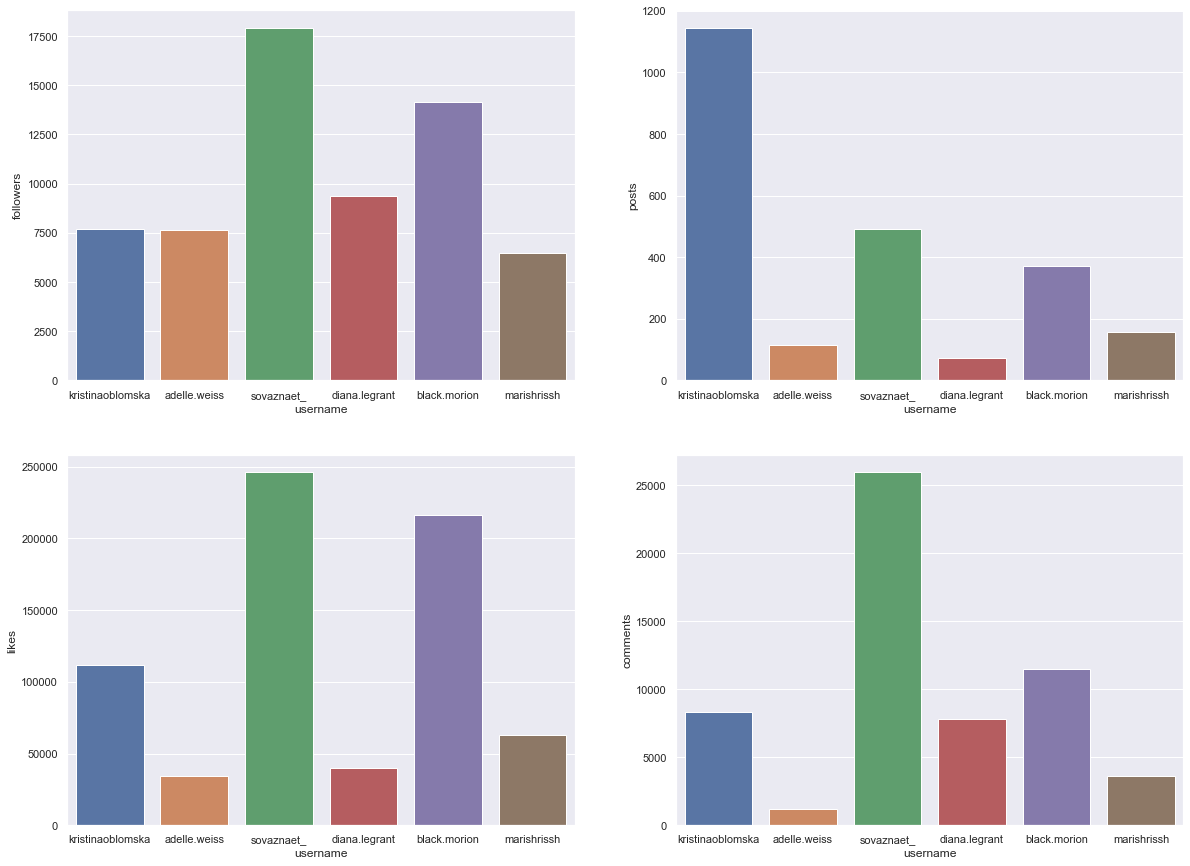

In [386]:
fig, saxis = plt.subplots(2, 2,figsize=(20,15))

sns.barplot(x='username', y='followers', data=inf_stat, ax = saxis [0,0])
sns.barplot(x='username', y='posts', data=inf_stat, ax = saxis [0,1])

sns.barplot(x='username', y='likes', data=inf_stat, ax = saxis [1,0])
sns.barplot(x='username', y='comments', data=inf_stat, ax = saxis [1,1])

Промежуточные выводы

1. Больше всего подписчиков у аккаунта - Sovaznaet_
2. Больше всего постов в инстаграме у аккаунта - Kristinaoblomska
3. Лайков больше у аккаунта - Sovaznaet_
4. Комментариев больше у аккаунта Sovaznaet

# Кол-во лайков на пост

Text(0.5, 1.0, 'Кол-во лайков на пост')

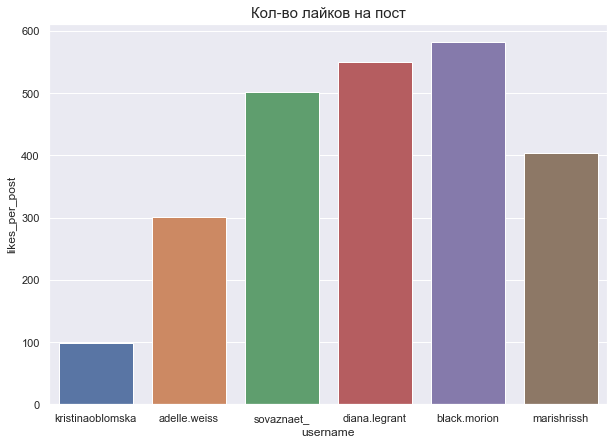

In [387]:
plt.figure(figsize=(10,7))
sns.barplot(x='username', y='likes_per_post', data=inf_stat)
plt.title('Кол-во лайков на пост', fontsize=15)

# Кол-во комментариев на пост

Text(0.5, 1.0, 'Кол-во комментов на пост')

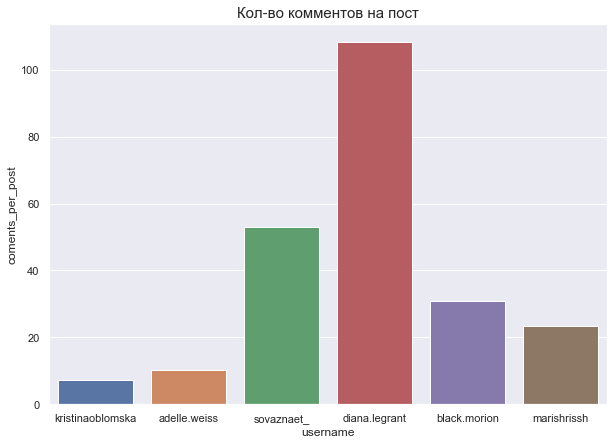

In [388]:
plt.figure(figsize=(10,7))
sns.barplot(x='username', y='coments_per_post', data=inf_stat)
plt.title('Кол-во комментов на пост', fontsize=15)

# ER

Text(0.5, 1.0, 'ER')

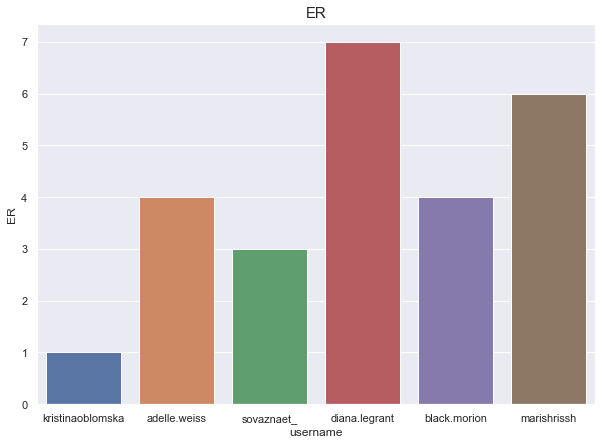

In [490]:
plt.figure(figsize=(10,7))
sns.barplot(x='username', y='ER', data=inf_stat)
plt.title('ER', fontsize=15)

# Распределение лайков на пост

Распределение лайков — это разница в количестве лайков под постами. Нормальным считается показатель от 40% до 100%

Он показывает каждый пост (точку) одновременно по двум характеристикам: лайкам и комментариям. Например, пост набрал 1198 лайков и 55 комментариев – точка ставится вправо на 1198 и вверх на 55.

Зачем это нужно? Публикации обычно заходят по-разному — что-то лучше, что-то хуже. Поэтому подозрительны две ситуации:

Если все точки рядом — то есть распределение до 40% — вероятно блогер подгоняет свои посты под какой-то уровень с помощью накрутки лайков

Если какие-то точки «убегают» от остальных.Пример: пост по лайкам сильно оторвался от остальных. Он может быть очень хорош, хотя есть вероятность, что его прорекламировали или накрутили. 

# Распределение лайков у аккаунта - marishrissh

Text(0.5, 1.0, 'Распределение лайков на пост у marishrissh ')

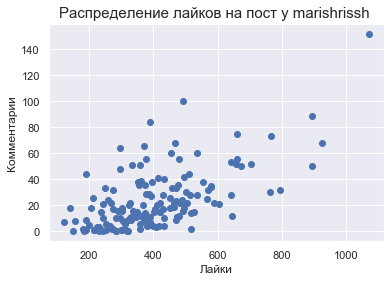

In [389]:
plt.scatter(marishrissh_parsing['Likes'], marishrissh_parsing['Coments'])
plt.xlabel('Лайки')
plt.ylabel('Комментарии')
plt.title('Распределение лайков на пост у marishrissh ', fontsize=15)

Распределение нормальное, в среднем посты собирают 400 постов и 20 лайков, есть один пост, который или рекламировался или очень хорошо зашел.

# Распределение лайков у аккаунта - kristinaoblomska

Text(0.5, 1.0, 'Распределение лайков на пост у kristinaoblomska')

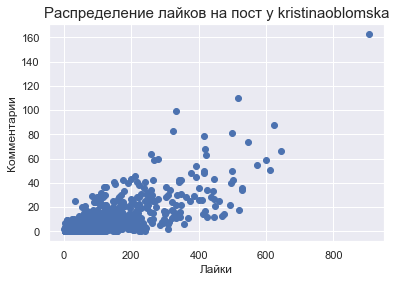

In [390]:
plt.scatter(kristinaoblomska_parsing['Likes'], kristinaoblomska_parsing['Coments'])
plt.xlabel('Лайки')
plt.ylabel('Комментарии')
plt.title('Распределение лайков на пост у kristinaoblomska', fontsize=15)

График говорит о том, что у автора очень много постов с очень маленькой реакцией, автор начинающий, но виден рост. В среднем пост собирает около 100 лайков и 10 комментариев. Есть всего один пост, который "убежал".

# Распределение лайков у аккаунта - adelle_weiss

Text(0.5, 1.0, 'Распределение лайков на пост у adelle_weiss')

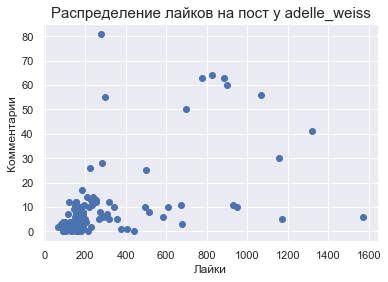

In [391]:
plt.scatter(adelle_weiss_parsing['Likes'], adelle_weiss_parsing['Coments'])
plt.xlabel('Лайки')
plt.ylabel('Комментарии')
plt.title('Распределение лайков на пост у adelle_weiss', fontsize=15)

График говорит о том, что некоторые посты заходят лучше, чем остальные, очевидно, что это или какая-то рубрика или определенная тематика. В среднем посты собирают 100 лайков и 10 комментариев. 

# Распределение лайков у аккаунта - sovaznaet_

Text(0.5, 1.0, 'Распределение лайков на пост у sovaznaet_')

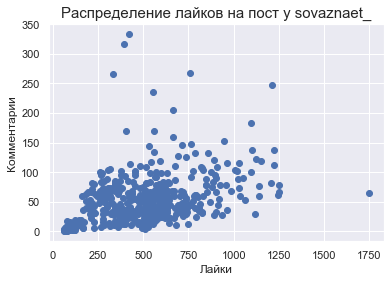

In [392]:
plt.scatter(sovaznaet_parsing['Likes'], sovaznaet_parsing['Coments'])
plt.xlabel('Лайки')
plt.ylabel('Комментарии')
plt.title('Распределение лайков на пост у sovaznaet_', fontsize=15)

Довольно широкое распределение лайков, виден рост. 500 лайков в среднем и 50 комментов к посту. 

# Распределение лайков у аккаунта - diana_legrant

Text(0.5, 1.0, 'Распределение лайков на пост у diana_legrant')

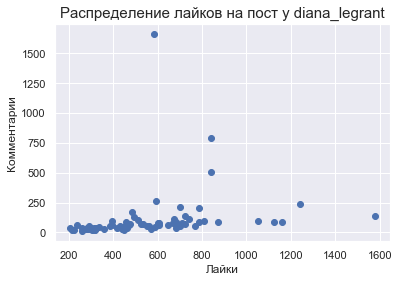

In [393]:
plt.scatter(diana_legrant_parsing['Likes'], diana_legrant_parsing['Coments'])
plt.xlabel('Лайки')
plt.ylabel('Комментарии')
plt.title('Распределение лайков на пост у diana_legrant', fontsize=15)

Распределение лайков довольно широкое, но практически нет постов с маленьким количеством лайков, что может говорить о том, что могло быть рекламное продвижение. Есть посты с большим количеством комментариев и лайков, которые "убегают", вероятно были конкурсы или посты, которые продвигались рекламно. 

# Распределение лайков у аккаунта - black_morion

Text(0.5, 1.0, 'Распределение лайков на пост у black_morion')

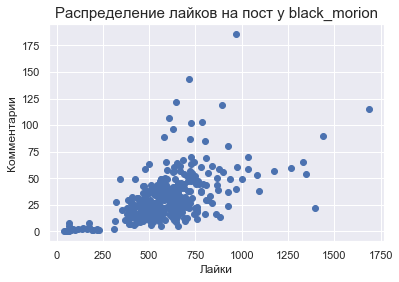

In [394]:
plt.scatter(black_morion_parsing['Likes'], black_morion_parsing['Coments'])
plt.xlabel('Лайки')
plt.ylabel('Комментарии')
plt.title('Распределение лайков на пост у black_morion', fontsize=15)

В среднем у постов 600 лайков и 30 комментариев, есть посты которые "убежали", но не так сильно, чтобы можно было думать, что есть рекламное продвижение или накрутка.

# Облако слов

# Pure

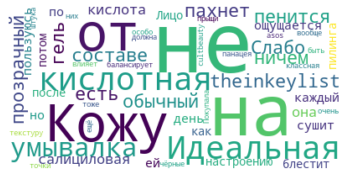

In [395]:
# Start with one review:
pure_text = pure_parsing.Text[100]

pure_wordcloud = WordCloud(max_font_size=100, max_words=300, background_color="white").generate(pure_text)
plt.figure()
plt.imshow(pure_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# marishrissh

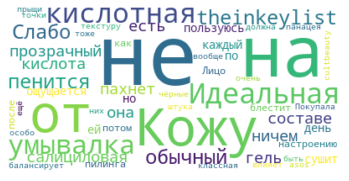

In [396]:
# Start with one review:
marishrissh_text = marishrissh_parsing.Text[100]

marishrissh_wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(marishrissh_text)
plt.figure()
plt.imshow(marishrissh_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Облако слов с очень схожо с облаком слов pure, простые фразы с небольшим количеством косметологических терминов.

# kristinaoblomska

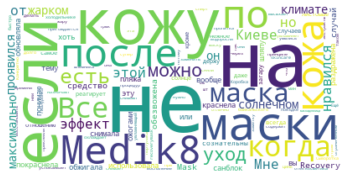

In [397]:
# Start with one review:
kristinaoblomska_text = kristinaoblomska_parsing.Text[200]

kristinaoblomska_wordcloud = WordCloud(max_font_size=100, max_words=1000, background_color="white").generate(kristinaoblomska_text)
plt.figure()
plt.imshow(kristinaoblomska_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Очень много слов о коже, масках и уходе за лицом. Очень много союзов "если", "когда" и "после". 

# adelle_weiss

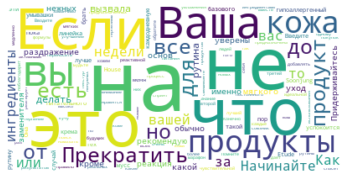

In [398]:
# Start with one review:
adelle_weiss_text = adelle_weiss_parsing.Text[100]

adelle_weiss_wordcloud = WordCloud(max_font_size=100, max_words=1000, background_color="white").generate(adelle_weiss_text)
plt.figure()
plt.imshow(adelle_weiss_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Автор говорит простым языком, рассказывает и объясняет о продуктах, коже. 

# sovaznaet_

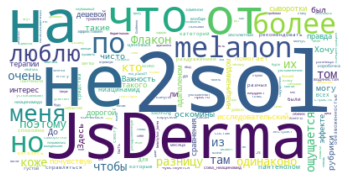

In [399]:
# Start with one review:
sovaznaet_text = sovaznaet_parsing.Text[100]

sovaznaet_wordcloud = WordCloud(max_font_size=100, max_words=1000, background_color="white").generate(sovaznaet_text)
plt.figure()
plt.imshow(sovaznaet_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Автор использует очень много терминов, профессиональный лексикон. Говорит о том, что ему нравится. 

# diana_legrant

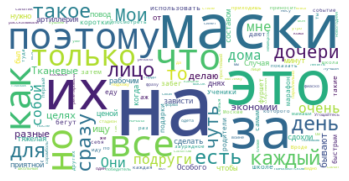

In [400]:
# Start with one review:
diana_legrant_text = diana_legrant_parsing.Text[50]

diana_legrant_wordcloud = WordCloud(max_font_size=100, max_words=1000, background_color="white").generate(diana_legrant_text)
plt.figure()
plt.imshow(diana_legrant_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Облако слов diana_legrant говорит о том, что автор говорит не только о уходе за кожой, но и о личной жизни.

# black_morion

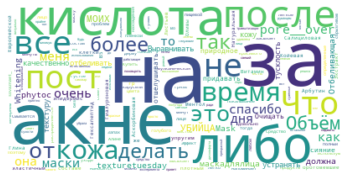

In [401]:
# Start with one review:
black_morion_text = black_morion_parsing.Text[50]

black_morion_wordcloud = WordCloud(max_font_size=100, max_words=1000, background_color="white").generate(black_morion_text)
plt.figure()
plt.imshow(black_morion_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


Очень много слов о ухожде за кожей: кислота, акне.  

# Конвертация значений 

In [402]:
# Изменение типов данных
inf_stat['ER'] = inf_stat['ER'].astype('int')
inf_stat['coments_per_post'] = inf_stat['coments_per_post'].astype('int')
inf_stat['likes_per_post'] = inf_stat['likes_per_post'].astype('int')

In [403]:
inf_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   username          6 non-null      object
 1   followers         6 non-null      int64 
 2   posts             6 non-null      int64 
 3   likes             6 non-null      int64 
 4   comments          6 non-null      int64 
 5   ER                6 non-null      int32 
 6   likes_per_post    6 non-null      int32 
 7   coments_per_post  6 non-null      int32 
dtypes: int32(3), int64(4), object(1)
memory usage: 440.0+ bytes


In [404]:
inf = inf_stat.replace({'username' : { 'kristinaoblomska' : 1, 'adelle.weiss' : 2, 'sovaznaet_':3, 'diana.legrant':4, 'black.morion':5, 'marishrissh':6 }})

kristinaoblomska = 1

adelle.weiss = 2

sovaznaet_ = 3

diana.legrant = 4

black.morion = 5

marishrissh	= 6



In [405]:
inf

,username,followers,posts,likes,comments,ER,likes_per_post,coments_per_post
0,1,7687,1145,111880,8299,1,97,7
1,2,7658,115,34589,1165,4,300,10
2,3,17927,490,246120,25965,3,502,52
3,4,9382,72,39665,7800,7,550,108
4,5,14168,371,216118,11487,4,582,30
5,6,6473,156,62903,3654,6,403,23


# Обучение и выборка

In [406]:
#в переменной X передаем признаки с вопросами
X = inf[['followers', 'posts', 'likes', 'comments']]
print(X)

   followers  posts   likes  comments
0       7687   1145  111880      8299
1       7658    115   34589      1165
2      17927    490  246120     25965
3       9382     72   39665      7800
4      14168    371  216118     11487
5       6473    156   62903      3654


In [407]:
y=inf['ER']
print(y)

0    1
1    4
2    3
3    7
4    4
5    6
Name: ER, dtype: int32


# Обучение модели

# Decision Tree Regressor

In [408]:
dtr = tree.DecisionTreeRegressor()
dtr = dtr.fit(X,y)

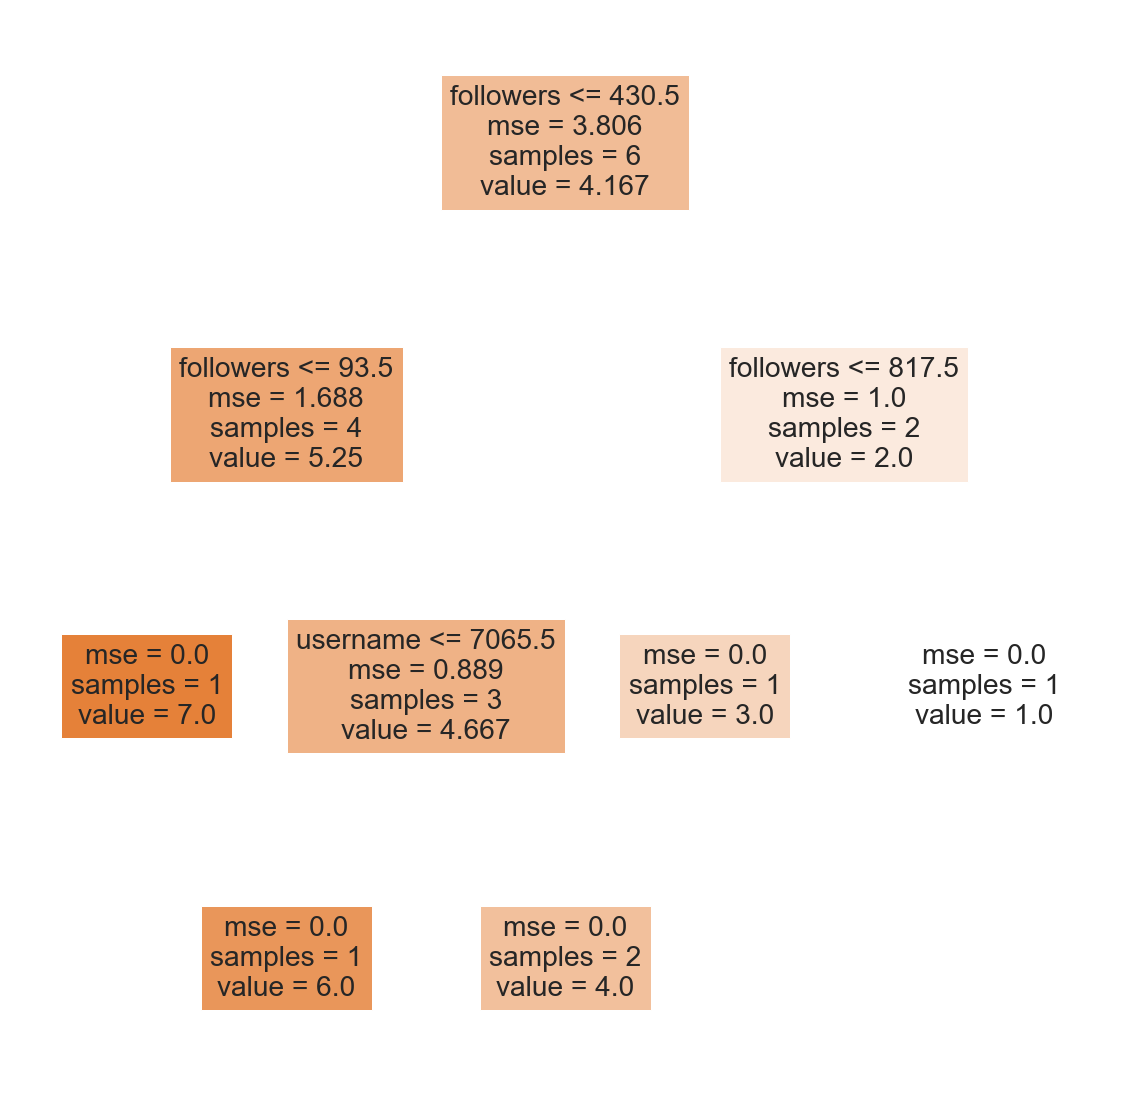

In [488]:
plt.figure(figsize=(20,20))
tree.plot_tree(dtr, feature_names=(X.columns),
     class_names=['ER'],
     filled=True)
plt.show()

Среднеквадратичная ошибка (MSE) или среднее квадратическое отклонение (MSD) оценщика измеряет среднее значение квадратов ошибок, то есть среднеквадратическую разницу между оцененными значениями и истинным значением. Это функция риска, соответствующая ожидаемому значению квадрата потери ошибок. Это всегда неотрицательно, и значения, близкие к нулю, лучше. MSE является вторым моментом ошибки (относительно источника) и, таким образом, включает в себя как дисперсию оценки, так и ее смещение.

sample () - это встроенная функция случайного модуля в Python, которая возвращает список элементов определенной длины, выбранный из последовательности, то есть списка, кортежа, строки или набора. Используется для случайной выборки без замены. Синтаксис: random.sample (sequence, k) Параметры: sequence: Может быть списком, кортежем, строкой или множеством.

values () - это встроенный метод в языке программирования Python, который возвращает список всех значений, доступных в данном словаре.

In [410]:
inf

,username,followers,posts,likes,comments,ER,likes_per_post,coments_per_post
0,1,7687,1145,111880,8299,1,97,7
1,2,7658,115,34589,1165,4,300,10
2,3,17927,490,246120,25965,3,502,52
3,4,9382,72,39665,7800,7,550,108
4,5,14168,371,216118,11487,4,582,30
5,6,6473,156,62903,3654,6,403,23


# Future importance

[0.11678832 0.79562044 0.08759124 0.        ]


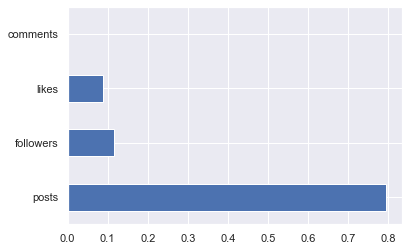

In [492]:
X = inf[['followers', 'posts', 'likes', 'comments']]
y=inf['ER']
model = tree.DecisionTreeRegressor()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Наиболее взаимосвязаны с ER, это кол-во постов

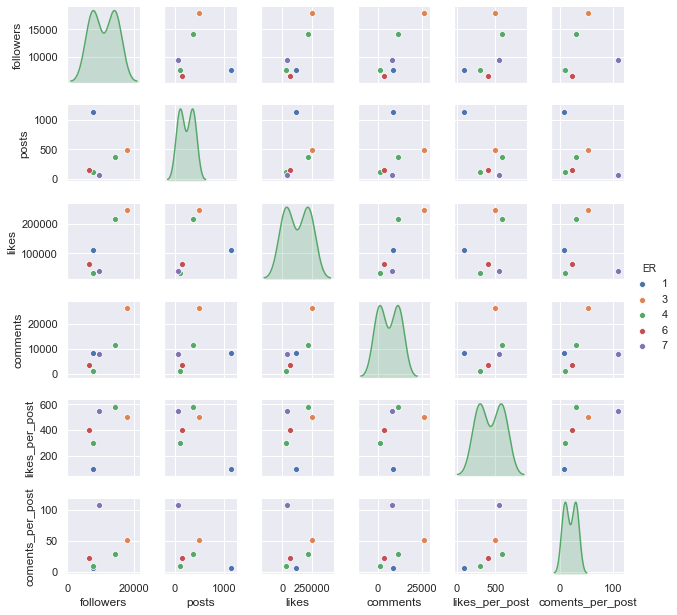

In [412]:
 %matplotlib inline
 import seaborn as sns; sns.set()
 sns.pairplot(inf_stat, hue='ER', size=1.4);